# Bank customers clustering project

This dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Column informations: 

- ID - Customer id
- Age - Customers age
- Experience - Number of years of professional experience
- Income - Annual income of the customer (x1000 USD)
- ZIP Code - Home Address ZIP code
- Family - Family size of the customer
- CCAVG - Avg. spending on credit cards per month (x1000 USD)
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage - Value of house mortgage if any. (x1000 USD)
- Personal Loan - Did this customer accept the personal loan offered in the last campaign?
- Securities Account - Does the customer have a securities account with the bank?(1-yes,0-no)
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?(1-yes,0-no)
- Online - Does the customer use internet banking facilities? (1-yes,0-no)
- CreditCard - Does the customer use a credit card issued by this Bank? (1-yes,0-no)

In [3]:
#renaming columns
df.columns=['id', 'age', 'experience', 'income', 'zip_code', 'family', 'cc_avg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'credit_card']

In [4]:
df2=df.copy()


In [5]:
#Converting values
df2["income"]=df["income"]*1000
df2["cc_avg"]=df["cc_avg"]*1000
df2["mortgage"]=df["mortgage"]*1000


In [6]:
df2.head()

,id,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,1,25,1,49000,91107,4,1600.0,1,0,0,1,0,0,0
1,2,45,19,34000,90089,3,1500.0,1,0,0,1,0,0,0
2,3,39,15,11000,94720,1,1000.0,1,0,0,0,0,0,0
3,4,35,9,100000,94112,1,2700.0,2,0,0,0,0,0,0
4,5,35,8,45000,91330,4,1000.0,2,0,0,0,0,0,1


## Dataset exploring

In [7]:
df2.shape

(5000, 14)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   cc_avg              5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df2["income"].describe()

count      5000.000000
mean      73774.200000
std       46033.729321
min        8000.000000
25%       39000.000000
50%       64000.000000
75%       98000.000000
max      224000.000000
Name: income, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6849f149a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6849f2b0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6849f14640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6849f2b760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6849f2bac0>],
 'means': []}

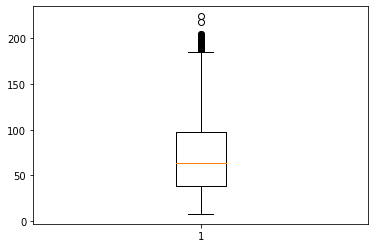

In [10]:
#visualize outliers with boxplot
plt.boxplot(df['income'])

In [11]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=98000 + 1.5*(98000 - 39000)
max_threshold

186500.0

In [12]:
# Removing outliers
df3=df2[df2.income<max_threshold]
# recalculate summary statistics
df3['income'].describe()

count      4904.000000
mean      71407.626427
std       43221.791049
min        8000.000000
25%       38000.000000
50%       63000.000000
75%       94000.000000
max      185000.000000
Name: income, dtype: float64

In [13]:
df3["cc_avg"].describe()

count    4904.000000
mean     1877.907830
std      1672.899582
min         0.000000
25%       700.000000
50%      1500.000000
75%      2500.000000
max      9000.000000
Name: cc_avg, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6849e83670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6849e83d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6849e83310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6849e0d430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6849e0d790>],
 'means': []}

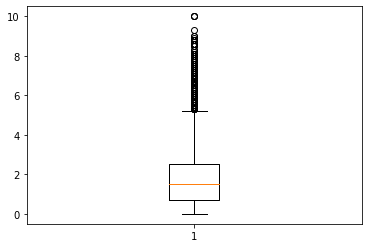

In [14]:
#visualize outliers with boxplot
plt.boxplot(df['cc_avg'])

In [15]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=2500+ 1.5*(2500 - 700)
max_threshold

5200.0

In [16]:
# Removing outliers
df4=df3[df3.cc_avg<max_threshold]
# recalculate summary statistics
df4['cc_avg'].describe()

count    4609.000000
mean     1570.164895
std      1159.936155
min         0.000000
25%       600.000000
50%      1400.000000
75%      2200.000000
max      5100.000000
Name: cc_avg, dtype: float64

In [17]:
df4["mortgage"].describe()

count      4609.000000
mean      53228.249078
std       94426.349489
min           0.000000
25%           0.000000
50%           0.000000
75%       98000.000000
max      612000.000000
Name: mortgage, dtype: float64

In [18]:
df4["mortgage"].value_counts()

0         3199
98000       17
83000       16
89000       16
103000      16
          ... 
406000       1
496000       1
305000       1
283000       1
385000       1
Name: mortgage, Length: 314, dtype: int64

In [19]:
df4.shape

(4609, 14)

## Data visualization

/home/mattdmv/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


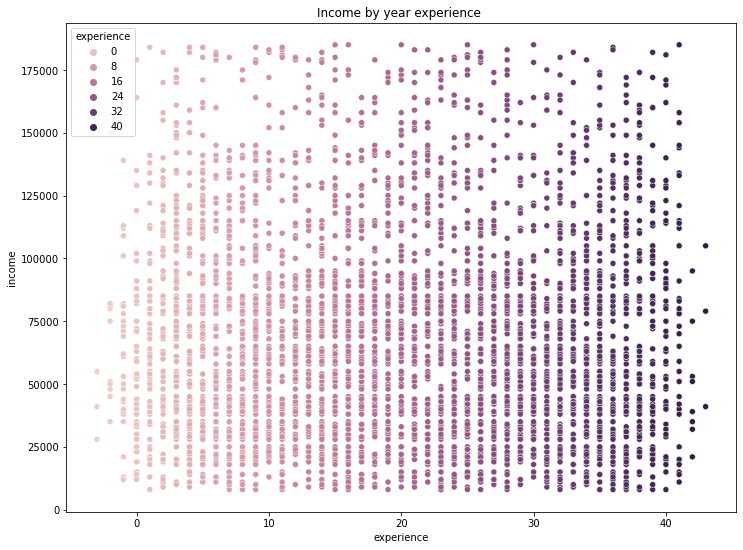

In [20]:
#Ploting scatterplot 
title = 'Income by year experience '
plt.figure(figsize=(12,9))
sns.scatterplot(df4.experience,df4.income,hue=df4.experience).set_title(title)
plt.ioff()

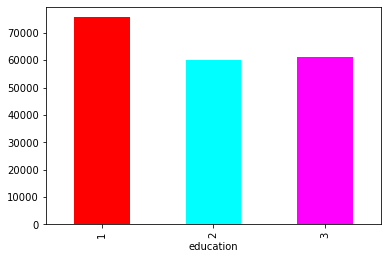

In [21]:
#Bar plot of average income by education
df4.groupby('education')["income"].mean().plot.bar(color=[ 'red', 'cyan',"magenta"])
plt.show()

<AxesSubplot:xlabel='family'>

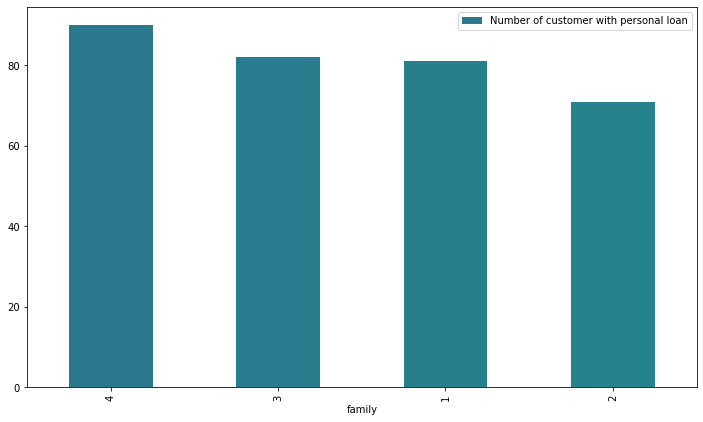

In [22]:
# Count customers presonal loan based on size of familiy
count_delayed=df4.groupby('family')['personal_loan'].apply(lambda x: (x==1).sum()).reset_index(name='Number of customer with personal loan')

color = cm.viridis(np.linspace(.4, .8, 30))

count_delayed= count_delayed.sort_values("Number of customer with personal loan" , ascending=[False])
count_delayed.plot.bar(x='family', y='Number of customer with personal loan', color=color , figsize=(12,7))

<AxesSubplot:ylabel='Frequency'>

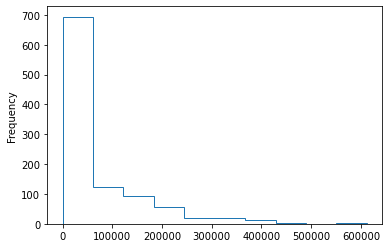

In [23]:
#Histogram of customers younger then 35  with mortgage
df4[df4.age<35]["mortgage"].plot.hist(histtype="step")

Almost 700 hundres customers with mortgage between 0$ and 50 000$.

## Preparing features

In [24]:
features=df4[["age","experience","income","cc_avg"]]

### Scaling features

In [25]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler=MinMaxScaler()

In [26]:
data_scaled_array=scaler.fit_transform(features)

In [27]:
scaled=pd.DataFrame(data_scaled_array, columns=features.columns)
scaled.head()

,age,experience,income,cc_avg
0,0.045455,0.086957,0.231638,0.313725
1,0.500000,0.478261,0.146893,0.294118
2,0.363636,0.391304,0.016949,0.196078
3,0.272727,0.260870,0.519774,0.529412
4,0.272727,0.239130,0.209040,0.196078


## KMeans cluster

In [28]:
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [29]:
#finding sum of the squared distance between centroid and each member of the cluster
k_range = range(1,10)
sse =[]

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    sse.append(km.inertia_)

In [30]:
sse

[1071.5847111643936,
 620.6440171686804,
 466.38996263518095,
 389.86069882745176,
 333.07619890597795,
 299.19054453741194,
 268.7531422361101,
 241.33759079024648,
 217.1853407574404]

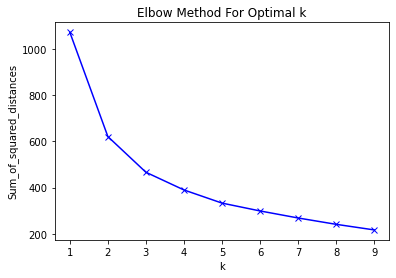

In [31]:
#Ploting kmeans elbow method
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

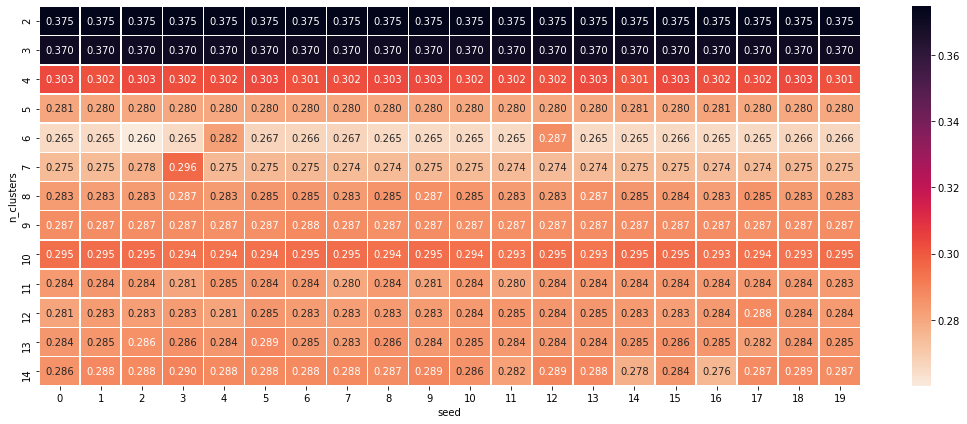

In [32]:
#Ploting silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(scaled)
        silhouette_avg = silhouette_score(scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed. 

Since there is small differences I will chose 3 clusters to get more insight into data.

In [38]:
km=KMeans(n_clusters=3)
predict=km.fit_predict(features)
predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [39]:
km.cluster_centers_

array([[4.58839779e+01, 2.05764273e+01, 3.39622468e+04, 1.03433702e+03,
        1.00000000e+00],
       [4.52549941e+01, 1.99788484e+01, 7.76269095e+04, 1.87162162e+03,
        2.00000000e+00],
       [4.49714286e+01, 1.99551020e+01, 1.37293878e+05, 2.45552381e+03,
        2.44249065e-15]])

In [40]:
features["cluster"]=predict
features.head()

,age,experience,income,cc_avg,cluster
0,25,1,49000,1600.0,0
1,45,19,34000,1500.0,0
2,39,15,11000,1000.0,0
3,35,9,100000,2700.0,1
4,35,8,45000,1000.0,0


In [45]:
grouped_km = features.groupby(['cluster']).mean().round()
grouped_km

,age,experience,income,cc_avg
cluster,,,,
0,46.0,21.0,33962.0,1034.0
1,45.0,20.0,77627.0,1872.0
2,45.0,20.0,137294.0,2456.0


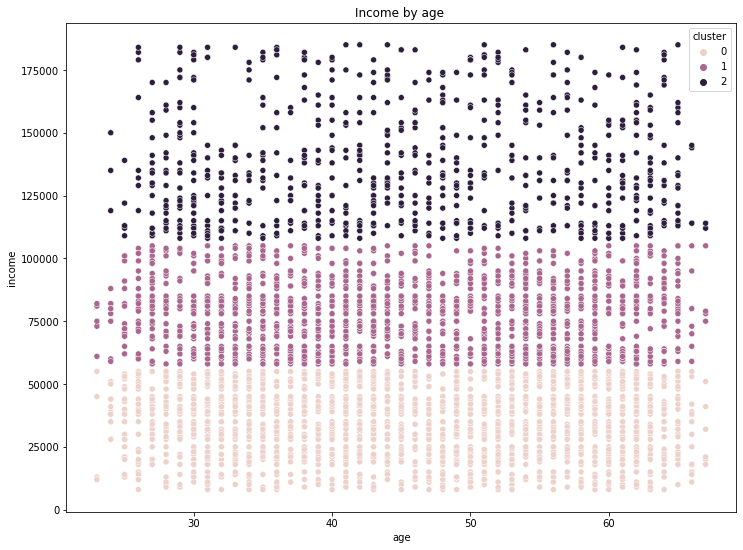

In [42]:
#Ploting scatterplot
title = 'Income by age '
plt.figure(figsize=(12,9))
sns.scatterplot(features.age,features.income,hue=features.cluster).set_title(title)
plt.ioff()

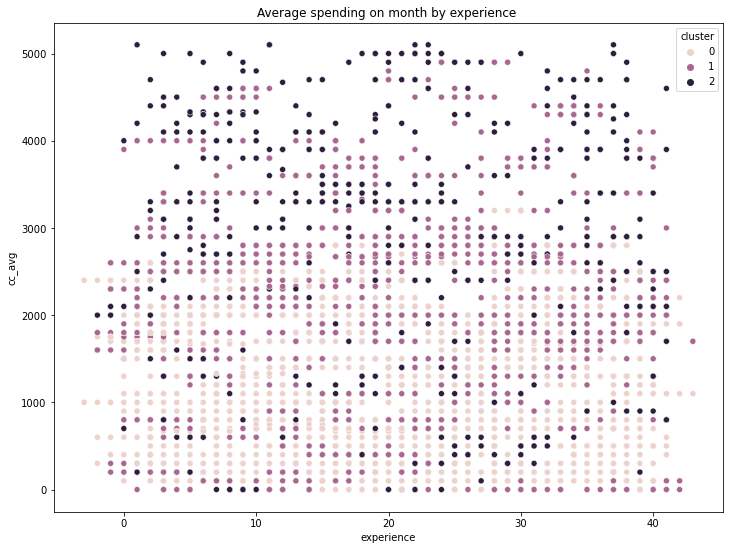

In [43]:
#Ploting scatterplot
title = 'Average spending on month by experience '
plt.figure(figsize=(12,9))
sns.scatterplot(features.experience,features.cc_avg,hue=features.cluster).set_title(title)
plt.ioff()